# ETL

 ## Librerias

In [1]:
# Para manejo de rutas
import os
import sys

# Manipulacion de data
import pandas as pd

# Trabajar con vectores
import numpy as np

# Visualizacion de data
import matplotlib.pyplot as plt
import seaborn as sns

#Trabajar con datos faltantes
import missingno as msno

# dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# modelos que se van a probar  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb #este es para la prediccion de desecho por vehiculo hasta 2040
from prophet import Prophet # intento de implementar series temporales

# Sacar metricas de evaluacion de los modelos que probemos
from sklearn.metrics import r2_score, mean_absolute_error

# Guardar modelos
import joblib



ModuleNotFoundError: No module named 'seaborn'

## Manejo de rutas de data de entrada

In [ ]:
PATH = os.getcwd()
DIR_DATA = PATH + '{0}datasets{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'C:\\Users\\owent\\OneDrive\\Escritorio\\Bootcamp\\Proyecto\\datasets\\'

In [ ]:
filename1 = DIR_DATA + 'Numero_de_Vehiculos_Electricos_Hibridos_2024_04_20.csv'

## Lectura de los datos

In [ ]:
df1 = pd.read_csv(filename1)

In [ ]:
df1

,COMBUSTIBLE,ESTADO,MODELO,FECHA_REGISTRO,AÑO_REGISTRO,CLASIFICACION,CLASE,SERVICIO,MARCA,LINEA,...,MODALIDAD,ORGANISMO_TRANSITO,MUNICIPIO,DEPARTAMENTO,CAPACIDAD_CARGA,CAPACIDAD_PASAJEROS,PESO,POTENCIA,EJES,CANTIDAD
0,ELECTRICO,ACTIVO,2022,06/30/2022 12:00:00 AM,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,49.0,20000.0,402.0,2.0,1
1,ELECTRICO,ACTIVO,2023,10/21/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,NaN,INSTITUTO DE MOVILIDAD DE PEREIRA,PEREIRA,Risaralda,NaN,NaN,1980.0,134.0,2.0,1
2,ELECTRICO,ACTIVO,2014,09/28/2015 12:00:00 AM,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,NaN,STRIA TTOyTTE MCPAL FLORENCIA,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,NaN,1
3,ELECTRICO,ACTIVO,2021,08/10/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,CARGA,STRIA TTOyTTE MCPAL FUNZA,FUNZA,Cundinamarca,845.0,NaN,2550.0,80.0,NaN,1
4,ELECTRICO,ACTIVO,2022,10/25/2021 12:00:00 AM,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,NaN,STRIA TTEyMOV CUND/EL ROSAL,EL ROSAL,Cundinamarca,NaN,NaN,2120.0,161.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56540,GASO ELEC,ACTIVO,2023,10/06/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,PASAJEROS,STRIA DE TTOyTTE MEDELLIN,MEDELLIN,Antioquia,NaN,NaN,1931.0,153.0,2.0,1
56541,GASO ELEC,ACTIVO,2023,10/07/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,NaN,SECRETARIA DE MOVILIDAD MUNICIPAL DE CHIA,CHIA,Cundinamarca,NaN,NaN,1931.0,153.0,2.0,1
56542,GASO ELEC,ACTIVO,2023,10/12/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,NaN,STRIA TTOyTTE MCPAL POPAYAN,POPAYAN,Cauca,NaN,NaN,1931.0,153.0,2.0,1
56543,GASO ELEC,ACTIVO,2023,09/30/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,NaN,1931.0,153.0,2.0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

In [ ]:
valores_unicos = df1['EJES'].unique()
print(valores_unicos)

[ 2. nan  0.  3. 21.  1.  5.  4.]


In [ ]:
len(valores_unicos)

8

In [ ]:
frecu_M = df1['DEPARTAMENTO'].value_counts()
frecu_M

DEPARTAMENTO
Bogota D.C.                                25507
Antioquia                                  14237
Cundinamarca                                4688
Valle del Cauca                             3222
Norte de Santander                          2350
Risaralda                                    958
Atlantico                                    846
Caldas                                       750
Santander                                    679
Meta                                         488
Boyaca                                       454
Tolima                                       431
Quindio                                      304
Narino                                       256
Huila                                        250
Bolivar                                      225
Cordoba                                      178
Sucre                                        148
Cesar                                        141
Cauca                                        136
Caqueta

In [ ]:
valores_unicos = df1['CLASIFICACION'].unique()
print(valores_unicos)

['AUTOMOVIL' 'MOTO' 'MOTOCARRO']


In [ ]:
valores_unicos = df1['AÑO_REGISTRO'].unique()
print(valores_unicos)

[2022 2015 2021 2019 2020 2014 2016 2013 2018 2012 2017 2010 2011]


In [ ]:
len(valores_unicos)

13

In [ ]:
frecu_C = df1['CLASIFICACION'].value_counts()
frecu_C

CLASIFICACION
AUTOMOVIL    54682
MOTO          1623
MOTOCARRO      240
Name: count, dtype: int64

In [ ]:
frecu_Cla = df1['CLASE'].value_counts()
frecu_Cla

CLASE
CAMIONETA       29565
AUTOMOVIL       17061
CAMPERO          4541
BUS              1962
MOTOCICLETA      1416
CUADRICICLO      1016
CAMION            530
MOTOCARRO         240
TRICIMOTO         188
MOTOTRICICLO       16
MICROBUS            6
CUATRIMOTO          3
TRACTOCAMION        1
Name: count, dtype: int64

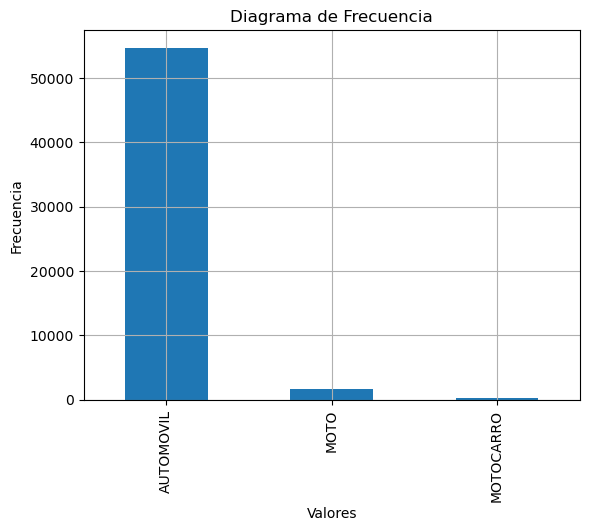

In [ ]:
frecu_C.plot(kind='bar')
plt.title('Diagrama de Frecuencia')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Ajuste de DataFrame

In [ ]:
# Suponiendo que cada vehiculo sin distincion tiene 2 baterias 1 principal y otra auxiliar (SI ES MOTO NO TIENE BATERIA AUX)
df1['BATERIA_PRINCIPAL'] = 1
df1['BATERIA_AUXILIAR'] = 0

In [ ]:
# Agregamos campo calculado para saber cuantas baterias tengo por vehiculo
df1['TOTAL_BATERIAS'] = df1['BATERIA_PRINCIPAL'] + df1['BATERIA_AUXILIAR']

In [ ]:
# Normalizar data
# Reemplazar 'Oficial' por 'Particular' en la columna 'SERVICIO'
df1['SERVICIO'] = df1['SERVICIO'].replace('Oficial', 'Particular')
df1['COMBUSTIBLE'] = df1['COMBUSTIBLE'].replace('GASO ELEC', 'HIBRIDO')
df1['COMBUSTIBLE'] = df1['COMBUSTIBLE'].replace('DIES ELEC', 'HIBRIDO')


In [ ]:
# Definir las condiciones basadas en 'SERVICIO' y 'COMBUSTIBLE'
condiciones = [
    (df1['SERVICIO'] == 'Público') & (df1['COMBUSTIBLE'] == 'ELECTRICO'),
    (df1['SERVICIO'] == 'Público') & (df1['COMBUSTIBLE'] == 'HIBRIDO'),
    (df1['SERVICIO'] == 'Particular') & (df1['COMBUSTIBLE'] == 'ELECTRICO'),
    (df1['SERVICIO'] == 'Particular') & (df1['COMBUSTIBLE'] == 'HIBRIDO')
]

# Definir los valores aleatorios en función de las condiciones
valores = [
    np.random.uniform(5, 6, size=len(df1)),  # Público, Eléctrico
    np.random.uniform(5, 6, size=len(df1)),  # Público, Híbrido
    np.random.uniform(8, 10, size=len(df1)),  # Particular, Eléctrico
    np.random.uniform(7, 8, size=len(df1))   # Particular, Híbrido
]

# Crear la columna 'DURABILIDAD_BATERIA' usando np.select
df1['DURABILIDAD_BATERIA'] = np.select(condiciones, valores, default=np.nan)

# Convertir la durabilidad a enteros si lo prefieres
df1['DURABILIDAD_BATERIA'] = df1['DURABILIDAD_BATERIA'].astype(int)


# Definir df

In [ ]:
df1 = df1[['COMBUSTIBLE','CLASE','SERVICIO','DEPARTAMENTO','AÑO_REGISTRO','PESO','EJES','TOTAL_BATERIAS','DURABILIDAD_BATERIA']]
df1

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
0,ELECTRICO,BUS,Público,Bogota D.C.,2022,20000.0,2.0,1,5
1,ELECTRICO,CAMIONETA,Particular,Risaralda,2022,1980.0,2.0,1,9
2,ELECTRICO,MOTOCICLETA,Particular,Caqueta,2015,NaN,NaN,1,9
3,ELECTRICO,CAMIONETA,Público,Cundinamarca,2022,2550.0,NaN,1,5
4,ELECTRICO,CAMIONETA,Particular,Cundinamarca,2021,2120.0,2.0,1,8
...,...,...,...,...,...,...,...,...,...
56540,HIBRIDO,CAMIONETA,Particular,Antioquia,2022,1931.0,2.0,1,7
56541,HIBRIDO,CAMIONETA,Particular,Cundinamarca,2022,1931.0,2.0,1,7
56542,HIBRIDO,CAMIONETA,Particular,Cauca,2022,1931.0,2.0,1,7
56543,HIBRIDO,CAMIONETA,Particular,Bogota D.C.,2022,1931.0,2.0,1,7


In [ ]:
# Filtrar donde la columna 'CLASE' sea igual a 'CAMIONETA' o 'AUTOMOVIL'
df_filtrado = df1[((df1['CLASE'] == 'CAMIONETA') | (df1['CLASE'] == 'AUTOMOVIL')) & 
                  ((df1['SERVICIO'] == 'Particular') | (df1['SERVICIO'] == 'Público'))]
#df_filtrado.reset_index(drop=True, inplace=True)
# Ver las primeras filas del dataframe filtrado
df_filtrado


,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
1,ELECTRICO,CAMIONETA,Particular,Risaralda,2022,1980.0,2.0,1,9
3,ELECTRICO,CAMIONETA,Público,Cundinamarca,2022,2550.0,NaN,1,5
4,ELECTRICO,CAMIONETA,Particular,Cundinamarca,2021,2120.0,2.0,1,8
5,ELECTRICO,AUTOMOVIL,Particular,Antioquia,2022,1440.0,2.0,1,8
6,ELECTRICO,AUTOMOVIL,Particular,Bogota D.C.,2019,1345.0,2.0,1,8
...,...,...,...,...,...,...,...,...,...
56539,HIBRIDO,CAMIONETA,Particular,Antioquia,2022,1931.0,2.0,1,7
56540,HIBRIDO,CAMIONETA,Particular,Antioquia,2022,1931.0,2.0,1,7
56541,HIBRIDO,CAMIONETA,Particular,Cundinamarca,2022,1931.0,2.0,1,7
56542,HIBRIDO,CAMIONETA,Particular,Cauca,2022,1931.0,2.0,1,7


# Preprocesamiento a datos faltantes

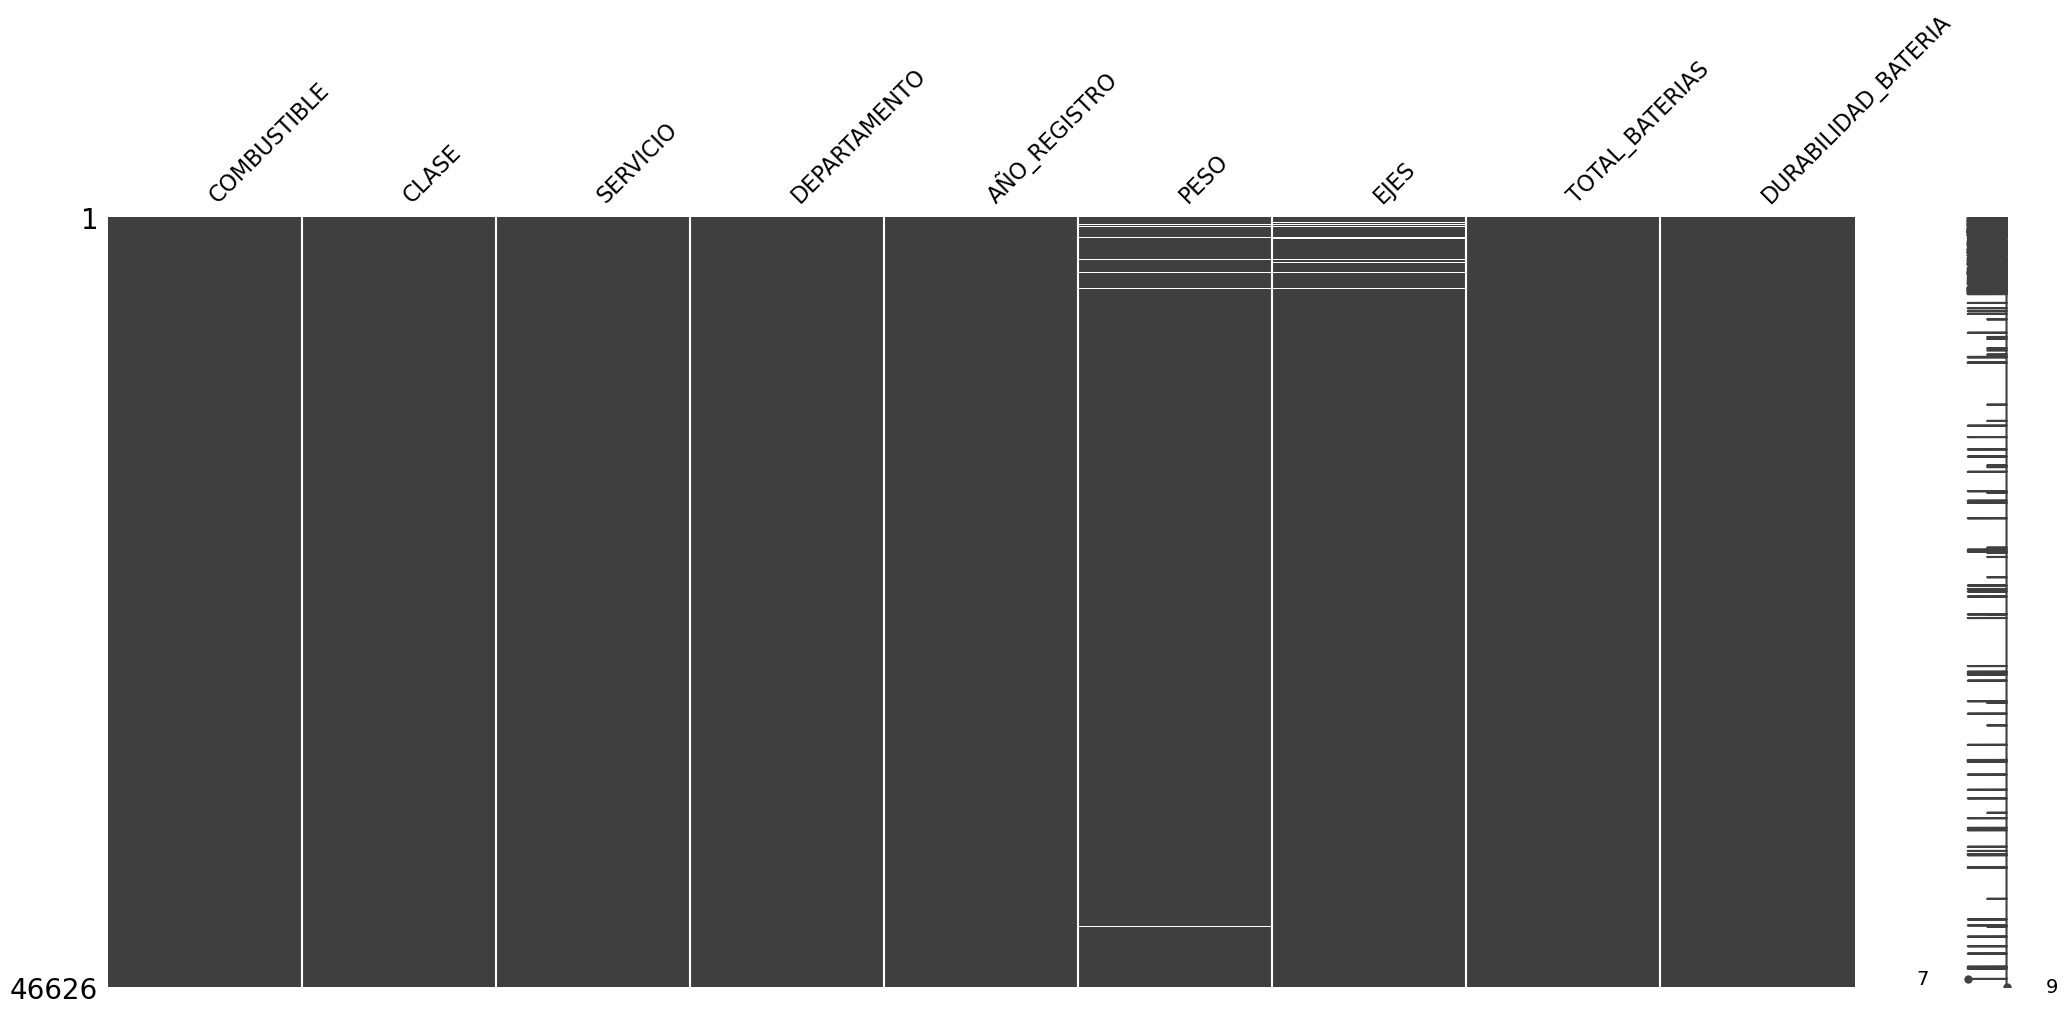

In [ ]:
msno.matrix(df_filtrado)
plt.show()

In [ ]:
df_filtrado.isnull().sum()

COMBUSTIBLE              0
CLASE                    0
SERVICIO                 0
DEPARTAMENTO             0
AÑO_REGISTRO             0
PESO                   404
EJES                   410
TOTAL_BATERIAS           0
DURABILIDAD_BATERIA      0
dtype: int64

In [ ]:
df_filtrado = df_filtrado.dropna(subset=['PESO', 'EJES'])

In [ ]:
df_filtrado.isnull().sum()

COMBUSTIBLE            0
CLASE                  0
SERVICIO               0
DEPARTAMENTO           0
AÑO_REGISTRO           0
PESO                   0
EJES                   0
TOTAL_BATERIAS         0
DURABILIDAD_BATERIA    0
dtype: int64

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46128 entries, 1 to 56543
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          46128 non-null  object 
 1   CLASE                46128 non-null  object 
 2   SERVICIO             46128 non-null  object 
 3   DEPARTAMENTO         46128 non-null  object 
 4   AÑO_REGISTRO         46128 non-null  int64  
 5   PESO                 46128 non-null  float64
 6   EJES                 46128 non-null  float64
 7   TOTAL_BATERIAS       46128 non-null  int64  
 8   DURABILIDAD_BATERIA  46128 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
# Categorizar la columna COMBUSTIBLE
df_filtrado['COMBUSTIBLE'] = df_filtrado['COMBUSTIBLE'].map({'HIBRIDO': 0, 'ELECTRICO': 1})

# Categorizar la columna CLASE
df_filtrado['CLASE'] = df_filtrado['CLASE'].map({'CAMIONETA': 0, 'AUTOMOVIL': 1})

# Categorizar la columna SERVICIO
df_filtrado['SERVICIO'] = df_filtrado['SERVICIO'].map({'Particular': 0, 'Público': 1})

# Categorizar la columna DEPARTAMENTO con valores de 0 a n (factorize asigna un número a cada valor único)
df_filtrado['DEPARTAMENTO'], _ = pd.factorize(df_filtrado['DEPARTAMENTO'])

# Ver las primeras filas del dataframe para confirmar los cambios
df_filtrado


C:\Users\owent\AppData\Local\Temp\ipykernel_15416\469513852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['COMBUSTIBLE'] = df_filtrado['COMBUSTIBLE'].map({'HIBRIDO': 0, 'ELECTRICO': 1})
C:\Users\owent\AppData\Local\Temp\ipykernel_15416\469513852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['CLASE'] = df_filtrado['CLASE'].map({'CAMIONETA': 0, 'AUTOMOVIL': 1})
C:\Users\owent\AppData\Local\Temp\ipykernel_15416\469513852.py:8: SettingWithCopyWarning: 
A value is trying to be

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
1,1,0,0,0,2022,1980.0,2.0,1,9
4,1,0,0,1,2021,2120.0,2.0,1,8
5,1,1,0,2,2022,1440.0,2.0,1,8
6,1,1,0,3,2019,1345.0,2.0,1,8
7,1,1,0,2,2021,1445.0,2.0,1,8
...,...,...,...,...,...,...,...,...,...
56539,0,0,0,2,2022,1931.0,2.0,1,7
56540,0,0,0,2,2022,1931.0,2.0,1,7
56541,0,0,0,1,2022,1931.0,2.0,1,7
56542,0,0,0,11,2022,1931.0,2.0,1,7


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46128 entries, 1 to 56543
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          46128 non-null  int64  
 1   CLASE                46128 non-null  int64  
 2   SERVICIO             46128 non-null  int64  
 3   DEPARTAMENTO         46128 non-null  int64  
 4   AÑO_REGISTRO         46128 non-null  int64  
 5   PESO                 46128 non-null  float64
 6   EJES                 46128 non-null  float64
 7   TOTAL_BATERIAS       46128 non-null  int64  
 8   DURABILIDAD_BATERIA  46128 non-null  int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 3.3 MB


In [ ]:
# Revisar la varianza de la columna TOTAL_BATERIAS
print(df_filtrado['TOTAL_BATERIAS'].var())


0.0


In [ ]:
df_filtrado.corr()

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
COMBUSTIBLE,1.000000,0.158525,0.243851,-0.065369,-0.323591,-0.092735,-0.066037,NaN,0.627577
CLASE,0.158525,1.000000,-0.075080,-0.103516,-0.186108,-0.485537,0.015726,NaN,0.187673
SERVICIO,0.243851,-0.075080,1.000000,-0.053990,-0.171201,0.064294,-0.119514,NaN,-0.530363
DEPARTAMENTO,-0.065369,-0.103516,-0.053990,1.000000,0.063665,-0.006753,0.004090,NaN,-0.015226
AÑO_REGISTRO,-0.323591,-0.186108,-0.171201,0.063665,1.000000,0.100770,0.081170,NaN,-0.135623
PESO,-0.092735,-0.485537,0.064294,-0.006753,0.100770,1.000000,0.030968,NaN,-0.138955
EJES,-0.066037,0.015726,-0.119514,0.004090,0.081170,0.030968,1.000000,NaN,0.047248
TOTAL_BATERIAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DURABILIDAD_BATERIA,0.627577,0.187673,-0.530363,-0.015226,-0.135623,-0.138955,0.047248,NaN,1.000000


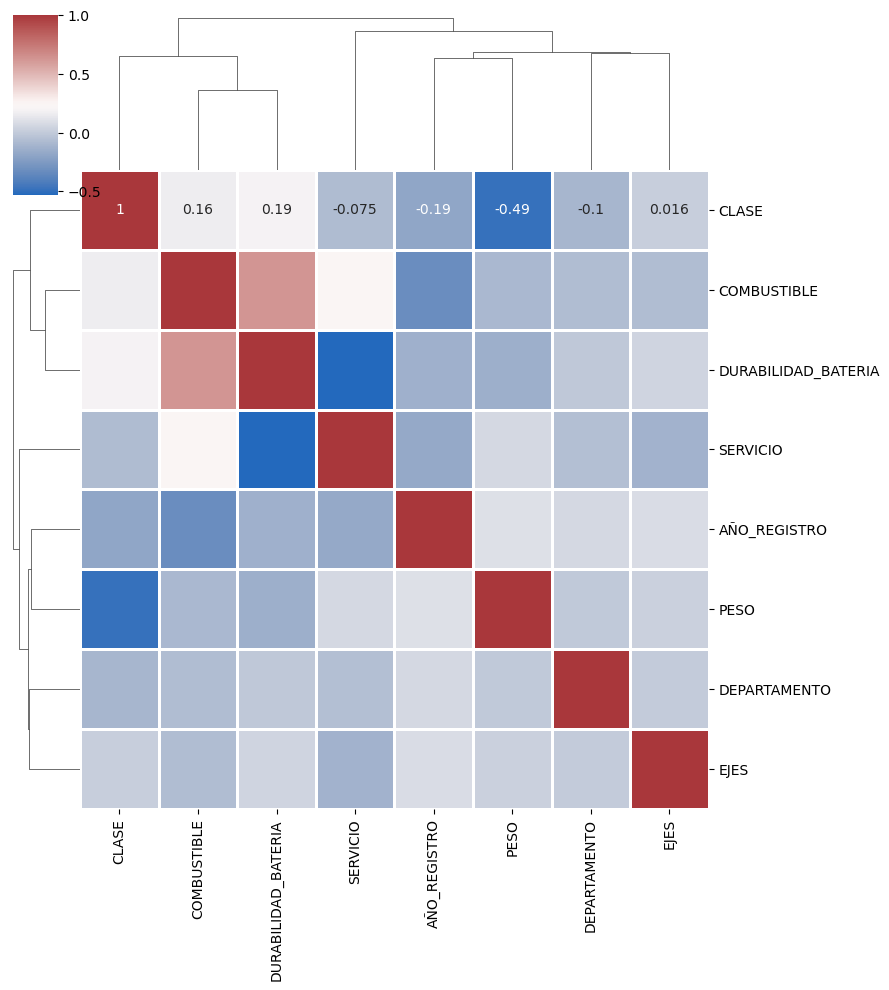

In [ ]:
# Excluir la columna TOTAL_BATERIAS del análisis de correlación
df_correlacion = df_filtrado.drop(columns=['TOTAL_BATERIAS'])

# Volver a calcular la correlación sin la columna TOTAL_BATERIAS
sns.clustermap(df_correlacion.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=.9, figsize=(9,10))
plt.show()


In [ ]:
# Calcular el año de reemplazo de las baterías
df_filtrado['AÑO_REEMPLAZO'] = df_filtrado['AÑO_REGISTRO'] + df_filtrado['DURABILIDAD_BATERIA']
df_filtrado

C:\Users\owent\AppData\Local\Temp\ipykernel_15416\1762038314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['AÑO_REEMPLAZO'] = df_filtrado['AÑO_REGISTRO'] + df_filtrado['DURABILIDAD_BATERIA']


,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO
1,1,0,0,0,2022,1980.0,2.0,1,9,2031
4,1,0,0,1,2021,2120.0,2.0,1,8,2029
5,1,1,0,2,2022,1440.0,2.0,1,8,2030
6,1,1,0,3,2019,1345.0,2.0,1,8,2027
7,1,1,0,2,2021,1445.0,2.0,1,8,2029
...,...,...,...,...,...,...,...,...,...,...
56539,0,0,0,2,2022,1931.0,2.0,1,7,2029
56540,0,0,0,2,2022,1931.0,2.0,1,7,2029
56541,0,0,0,1,2022,1931.0,2.0,1,7,2029
56542,0,0,0,11,2022,1931.0,2.0,1,7,2029


In [ ]:
import numpy as np

# Calcular los cambios proyectados desde AÑO_REGISTRO hasta el año 2039 (2024 + 15)
df_filtrado['CAMBIOS_A_2040'] = (
    (2040 - df_filtrado['AÑO_REGISTRO']) / df_filtrado['DURABILIDAD_BATERIA']
).astype(int)

# Verifica los primeros registros para confirmar el cálculo
df_filtrado


C:\Users\owent\AppData\Local\Temp\ipykernel_15416\3015191118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['CAMBIOS_A_2040'] = (


,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO,CAMBIOS_A_2040
1,1,0,0,0,2022,1980.0,2.0,1,9,2031,2
4,1,0,0,1,2021,2120.0,2.0,1,8,2029,2
5,1,1,0,2,2022,1440.0,2.0,1,8,2030,2
6,1,1,0,3,2019,1345.0,2.0,1,8,2027,2
7,1,1,0,2,2021,1445.0,2.0,1,8,2029,2
...,...,...,...,...,...,...,...,...,...,...,...
56539,0,0,0,2,2022,1931.0,2.0,1,7,2029,2
56540,0,0,0,2,2022,1931.0,2.0,1,7,2029,2
56541,0,0,0,1,2022,1931.0,2.0,1,7,2029,2
56542,0,0,0,11,2022,1931.0,2.0,1,7,2029,2


In [ ]:
df_filtrado.to_csv('Data_final.csv', index=False)

In [ ]:
# Cargar el dataset
df = df_filtrado.copy()

In [ ]:
# Estadísticas descriptivas generales
df.describe()


,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO,CAMBIOS_A_2040
count,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.0,46128.000000,46128.000000,46128.000000
mean,0.091420,0.366914,0.016346,3.768796,2021.101153,1950.659426,1.996531,1.0,7.087951,2028.189104,2.093176
std,0.288208,0.481968,0.126803,3.624783,1.256561,451.473052,0.156479,0.0,0.507498,1.289777,0.336322
min,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,1.0,5.000000,2015.000000,2.000000
25%,0.000000,0.000000,0.000000,2.000000,2021.000000,1795.000000,2.000000,1.0,7.000000,2028.000000,2.000000
50%,0.000000,0.000000,0.000000,3.000000,2021.000000,1850.000000,2.000000,1.0,7.000000,2028.000000,2.000000
75%,0.000000,1.000000,0.000000,3.000000,2022.000000,2075.000000,2.000000,1.0,7.000000,2029.000000,2.000000
max,1.000000,1.000000,1.000000,27.000000,2022.000000,4980.000000,21.000000,1.0,9.000000,2031.000000,6.000000


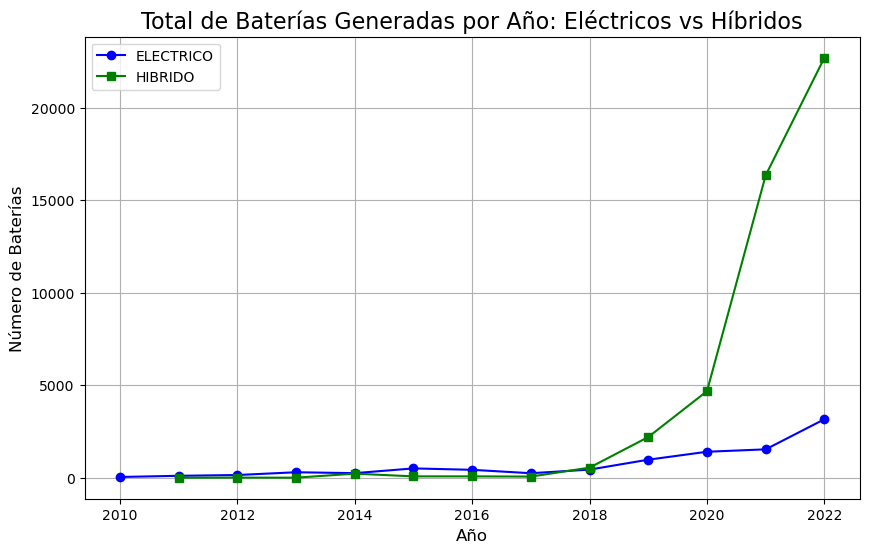

In [ ]:
baterias_por_ano_combustible = df1.groupby(['AÑO_REGISTRO', 'COMBUSTIBLE'])['TOTAL_BATERIAS'].sum().unstack()

plt.figure(figsize=(10, 6))
plt.plot(baterias_por_ano_combustible.index, baterias_por_ano_combustible['ELECTRICO'], marker='o', linestyle='-', color='b', label='ELECTRICO')
plt.plot(baterias_por_ano_combustible.index, baterias_por_ano_combustible['HIBRIDO'], marker='s', linestyle='-', color='g', label='HIBRIDO')

plt.title('Total de Baterías Generadas por Año: Eléctricos vs Híbridos', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Baterías', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()


# Analisis de correlacion de Pearson 

C:\Users\owent\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


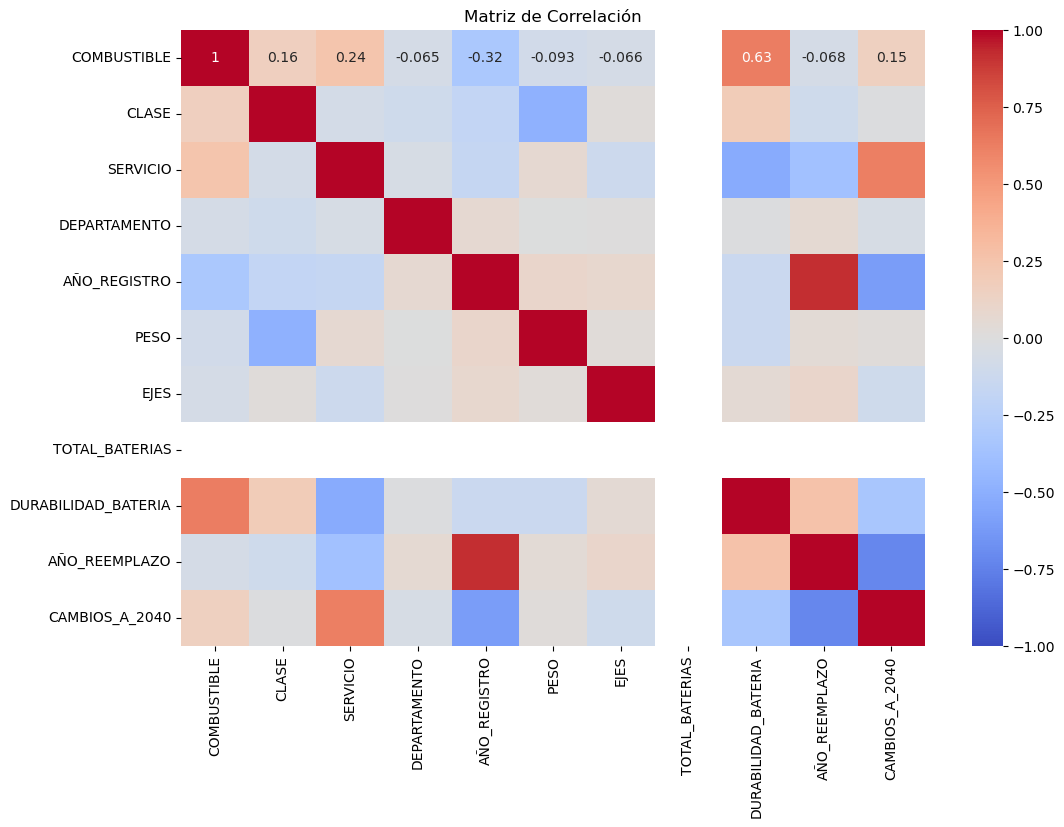

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


# dividimos la data entre train y test

In [ ]:
X = df[['COMBUSTIBLE', 'AÑO_REGISTRO', 'SERVICIO']]
y = df['CAMBIOS_A_2040']

# División de los datos en entrenamiento y prueba con 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Entrenamiento de 3 modelos

In [ ]:
#regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost 
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Función para evaluar los modelos
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mae

# Evaluación de cada modelo
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgbr}
for name, model in models.items():
    r2, mae = evaluate_model(model, X_test, y_test)
    print(f"{name} - R²: {r2:.4f}, MAE: {mae:.4f}")


Linear Regression - R²: 0.6482, MAE: 0.1350
Random Forest - R²: 0.9831, MAE: 0.0037
XGBoost - R²: 0.9831, MAE: 0.0037


In [ ]:
# aca se toma XGBoost por que es el que mejor performa, y nos lo recomendo el profe en una turoria

In [ ]:
# Guardar el modelo
joblib.dump(xgbr, "modelo_xgboost.pkl")
print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.


## HIBRIDO': 0, 'ELECTRICO': 1
## PARTICULAR': 0, 'PUBLICO': 1

    np.random.uniform(5, 6, size=len(df1)),  # Público, Eléctrico
    np.random.uniform(5, 6, size=len(df1)),  # Público, Híbrido
    np.random.uniform(8, 10, size=len(df1)),  # Particular, Eléctrico
    np.random.uniform(7, 8, size=len(df1))   # Particular, Híbrido

In [ ]:
# Filtramos los datos (esto es para comprarrar la prediccion que se hace desde streamlit)
prueba = df_filtrado[(df_filtrado['COMBUSTIBLE'] == 1) &
                            (df_filtrado['SERVICIO'] == 0) &
                            (df_filtrado['AÑO_REGISTRO'] == 2024)]

prueba

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO,CAMBIOS_A_2040


# Modelo 2 Volumen de desechos 

In [ ]:
# Agrupamos por AÑO_REEMPLAZO y sumamos el total de baterías
df_volumen = df_filtrado.groupby('AÑO_REEMPLAZO')['CAMBIOS_A_2040'].sum().reset_index()

# Renombramos las columnas
df_volumen.columns = ['Año', 'Total_Baterías_Desechadas']
df_volumen


,Año,Total_Baterías_Desechadas
0,2015,78
1,2016,85
2,2017,5
3,2018,235
4,2019,78
5,2020,138
6,2021,60
7,2022,98
8,2023,421
9,2024,1099


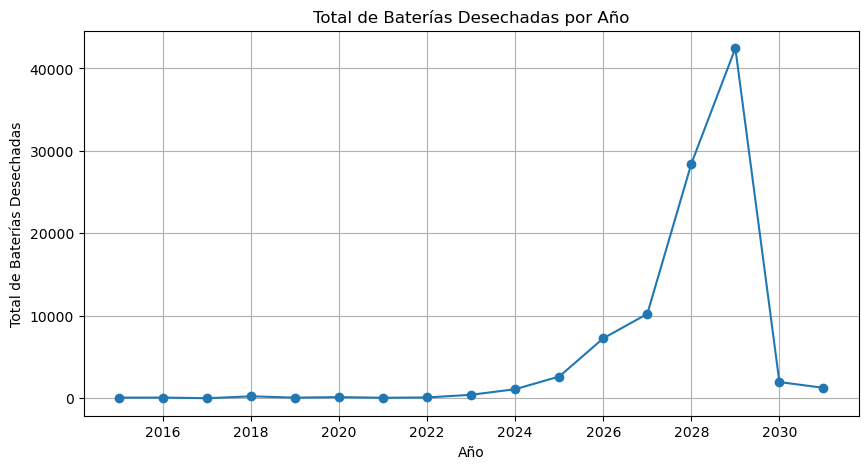

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_volumen['Año'], df_volumen['Total_Baterías_Desechadas'], marker='o')
plt.title('Total de Baterías Desechadas por Año')
plt.xlabel('Año')
plt.ylabel('Total de Baterías Desechadas')
plt.grid()
plt.show()


In [ ]:
df_prophet = df_volumen.rename(columns={'Año': 'ds', 'Total_Baterías_Desechadas': 'y'})

#entrenar el modelo
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

# aca se gradua el año para el cual se quiere hacer la predicción
año_a_predecir = 2029
futuro = pd.DataFrame({'ds': [f'{año_a_predecir}-01-01']})  # Fecha en el primer día del año

# Hacer la predicción
predicciones = modelo_prophet.predict(futuro)

#estimado de baterías desechadas
numero_baterias_estimadas = predicciones['yhat'].values[0]

print(f"Se estima que habrá aproximadamente {numero_baterias_estimadas:.2f} baterías desechadas en el año {año_a_predecir}.")


01:01:33 - cmdstanpy - INFO - Chain [1] start processing
01:01:33 - cmdstanpy - INFO - Chain [1] done processing


Se estima que habrá aproximadamente 14019.95 baterías desechadas en el año 2029.
